In [ ]:
#I am putting My datasete in Google drive, so i will import it Use here in google colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# Allowing acesss to the files by the use of drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/Coriander vs Parsley/train'
test_dir = '/content/drive/MyDrive/Coriander vs Parsley/test'

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/Coriander vs Parsley/train/coriander')))
print(len(os.listdir('/content/drive/MyDrive/Coriander vs Parsley/train/parsley')))
print(len(os.listdir('/content/drive/MyDrive/Coriander vs Parsley/test/coriander')))
print(len(os.listdir('/content/drive/MyDrive/Coriander vs Parsley/test/parsley')))

121
74
29
22


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 155 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())  # reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
5/5 [==============================] - 35s 6s/step - loss: 1.6965 - accuracy: 0.5806 - val_loss: 0.6604 - val_accuracy: 0.6316
Epoch 2/30
5/5 [==============================] - 24s 5s/step - loss: 0.6610 - accuracy: 0.6194 - val_loss: 0.6618 - val_accuracy: 0.6316
Epoch 3/30
5/5 [==============================] - 23s 5s/step - loss: 0.6628 - accuracy: 0.6194 - val_loss: 0.6288 - val_accuracy: 0.6316
Epoch 4/30
5/5 [==============================] - 22s 4s/step - loss: 0.6018 - accuracy: 0.6452 - val_loss: 0.6312 - val_accuracy: 0.6842
Epoch 5/30
5/5 [==============================] - 24s 5s/step - loss: 0.5587 - accuracy: 0.7419 - val_loss: 0.5949 - val_accuracy: 0.6579
Epoch 6/30
5/5 [==============================] - 22s 4s/step - loss: 0.4902 - accuracy: 0.7742 - val_loss: 0.6348 - val_accuracy: 0.6316
Epoch 7/30
5/5 [==============================] - 24s 5s/step - loss: 0.3865 - accuracy: 0.8258 - val_loss: 0.5492 - val_accuracy: 0.7368
Epoch 8/30
5/5 [==================

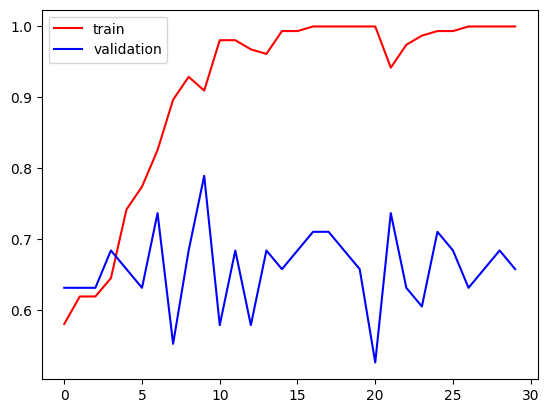

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

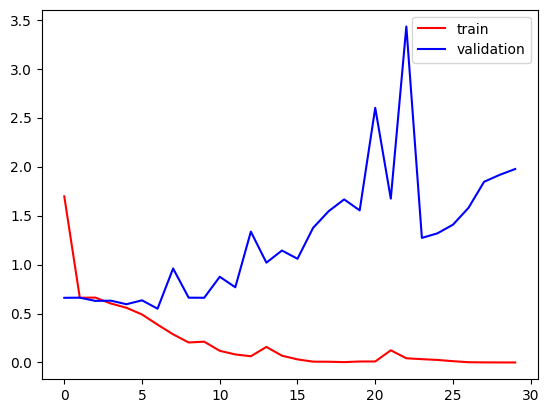

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 51 images belonging to 2 classes.


In [ ]:
#test data prediction
predictions = model.predict(test_data)
print(predictions)

2/2 [==============================] - 6s 4s/step
[[5.42571186e-04]
 [6.91289723e-01]
 [1.40442080e-05]
 [7.64375865e-01]
 [4.26149257e-02]
 [9.99185920e-01]
 [1.64033045e-04]
 [9.99074459e-01]
 [7.73659039e-08]
 [5.68070163e-06]
 [9.44970727e-01]
 [4.99279704e-04]
 [2.27040050e-06]
 [1.18079916e-01]
 [9.99806821e-01]
 [9.43341183e-06]
 [9.99335587e-01]
 [6.00853682e-01]
 [7.63816416e-01]
 [7.24194397e-04]
 [1.04512007e-03]
 [5.00001153e-03]
 [1.86318457e-01]
 [1.60203126e-04]
 [9.86939192e-01]
 [1.34536102e-01]
 [3.01055465e-04]
 [9.99784946e-01]
 [3.49514194e-05]
 [1.83470678e-02]
 [9.07248139e-01]
 [9.73048925e-01]
 [3.31729986e-02]
 [6.62316203e-01]
 [1.56357521e-06]
 [8.64190876e-01]
 [9.99965549e-01]
 [3.01391174e-05]
 [9.99599218e-01]
 [9.92919266e-01]
 [8.18148375e-01]
 [3.18338419e-03]
 [6.36797864e-04]
 [8.65923911e-02]
 [9.99998689e-01]
 [2.72786915e-02]
 [9.99995887e-01]
 [2.60129094e-01]
 [9.78814363e-01]
 [3.25418456e-04]
 [4.54491191e-03]]


In [ ]:
len(predictions)

51

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # the threshold is 0.5

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[18 11]
 [11 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        29
           1       0.50      0.50      0.50        22

    accuracy                           0.57        51
   macro avg       0.56      0.56      0.56        51
weighted avg       0.57      0.57      0.57        51

